In [1]:
import pandas as pd
import numpy as np

In [2]:
FILEPATH = "Y:/Members_Current/Jenn/EEG study/Imported data/cleaned/"
participants = ["107", "904", "905", "906"]

from ml_prep import prep_ml
X,y,p,w = prep_ml(FILEPATH, participants)

C:\Users\Karl\Documents\jwlab_eeg\code\jwlab_eeg\classification\ml_prep.py:73: RuntimeWarning: Mean of empty slice.
  means = df_data[np.logical_and(df.participant == p, df.label == w)].values.mean()
c:\users\karl\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [3]:
y.shape[0]

62

In [4]:
(n, d) = X.shape
assert n == y.shape[0]

In [5]:
# from sklearn.svm import SVC
# model = SVC(gamma='auto', kernel='linear')

In [6]:
from sklearn.svm import LinearSVC
model = LinearSVC(C=1e-6)

In [7]:
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier()

In [8]:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression(solver='liblinear', C=1e-6)

In [9]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(model)

In [10]:
# from sklearn.model_selection import GridSearchCV

# param_grid = [
  # {'C': np.logspace(-10, -5, 3)}
 # ]

# tuned_model = GridSearchCV(model, param_grid)
# tuned_model.fit(X, y)

# tuned_model.cv_results_

In [17]:
from sklearn.model_selection import train_test_split
import sys

num_participants = int(np.max(p)) + 1
num_trials = 100
errs = np.zeros((num_participants, num_trials))
for i in range(num_trials):
    X_train, X_test, y_train, y_test, p_train, p_test = train_test_split(X, y, p, test_size=0.3, random_state=i+450321)
    model.fit(X_train, y_train)
    
    for j in range(num_participants):
        if len(y_test[p_test == j]) == 0:
            errs[j, i] = 0.5
        else:
            errs[j, i] = np.mean(model.predict(X_test[p_test == j]) != y_test[p_test == j])
    
    sys.stdout.write('\r')
    percent = (i + 1) / num_trials
    sys.stdout.write("[%-20s] %d%%" % ('='*int(20*percent), percent*100))

[====================] 100%

In [18]:
for j in range(num_participants):
    print(np.mean(errs[j, :]))

0.5793650793650793
0.5465238095238096
0.5546666666666666
0.5612857142857143


In [14]:
# np.std(errs)

0.21900064755310156

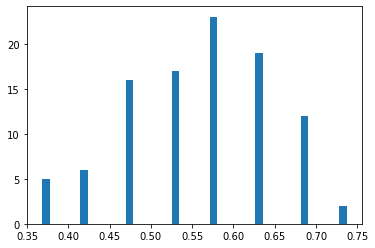

In [83]:
import matplotlib.pyplot as plt
plt.hist(errs, bins=40)
plt.show()

In [84]:
model

BaggingClassifier(base_estimator=LinearSVC(C=1e-06, class_weight=None,
                                           dual=True, fit_intercept=True,
                                           intercept_scaling=1,
                                           loss='squared_hinge', max_iter=1000,
                                           multi_class='ovr', penalty='l2',
                                           random_state=None, tol=0.0001,
                                           verbose=0),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)